<a href="https://colab.research.google.com/github/shuangquan-li-con/ECON5200-37499-Applied-Data-Analytics-in-Economics/blob/main/lab3(new%20one).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
country_codes=['GTM','UMC','WLD']
indicators={
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [ ]:
print("Fetching data...")
df_raw=wb.data.DataFrame(indicators,economy=country_codes,time=range(2000,2025))


Fetching data...


In [ ]:
df=df_raw.T

In [ ]:
df.index=df.index.str.replace('YR','').astype(int)
df.index.name='Year'
df=df.sort_index()

In [ ]:
df.rename(columns=indicators,level=1,inplace=True)
df_gtm=df.xs('GTM',axis=1,level=0).copy()

In [ ]:
df_gtm['Natural_Rate_Unemp']=df_gtm['Unemployment_Rate'].rolling(window=5).mean()
df_gtm['Productivity']=df_gtm['GDP_Const']/df_gtm['Labor_Force_Total']
df_gtm['Nco']=df_gtm['Exports_GDP']-df_gtm['Imports_GDP']
df_gtm['Budget_Balanca']=df_gtm['Tax_Rev_GDP']-df_gtm['Gov_Exp_GDP']

AttributeError: module 'matplotlib.pyplot' has no attribute 'lengen'

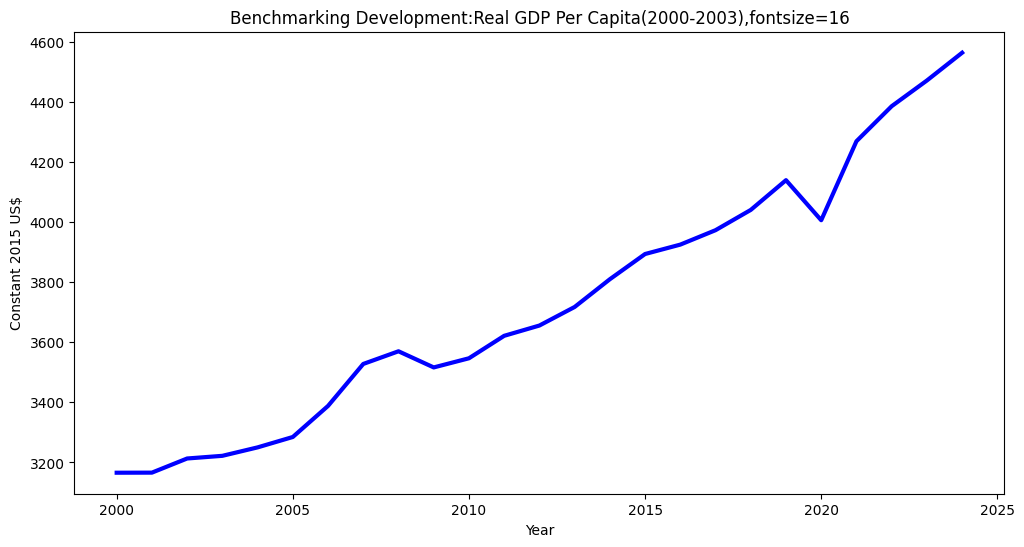

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df[('GTM','GDP_Per_Capita_Const')],label='Guatemala',color='blue',linewidth=3)
plt.title('Benchmarking Development:Real GDP Per Capita(2000-2003),fontsize=16')
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.lengen()
plt.grid(True,alpha=0.3)
plt.show()

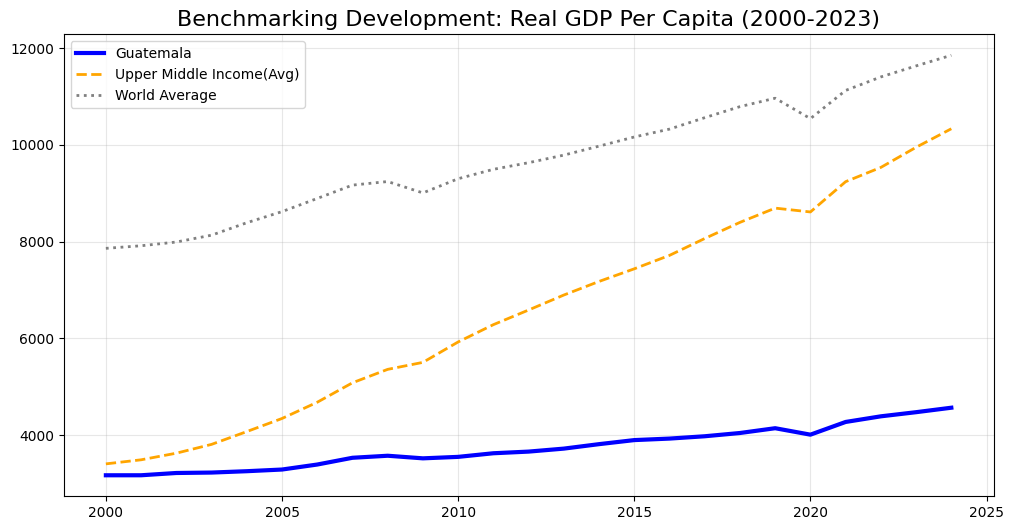

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df[('GTM','GDP_Per_Capita_Const')],label='Guatemala',color='blue',linewidth=3)
plt.plot(df.index,df[('UMC','GDP_Per_Capita_Const')],label='Upper Middle Income(Avg)',color='orange',linestyle='--',linewidth=2)
plt.plot(df.index,df[('WLD','GDP_Per_Capita_Const')],label='World Average',color='grey',linestyle=':',linewidth=2)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)',fontsize=16)
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()

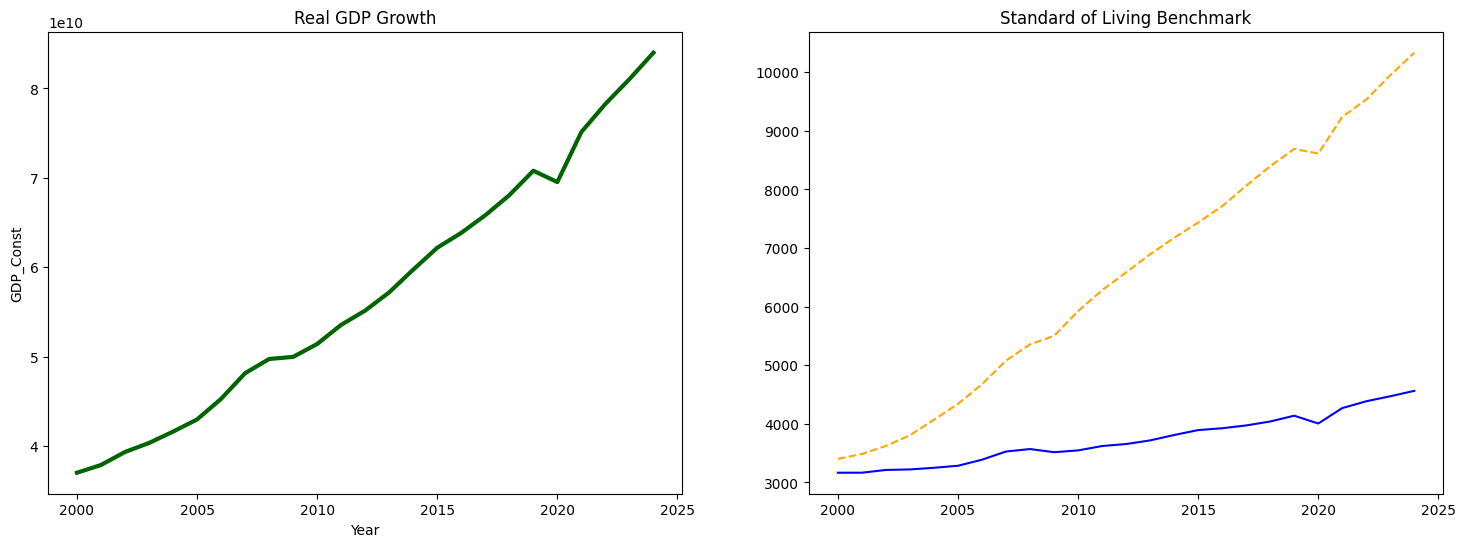

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,6))
sns.lineplot(data=df_gtm,x=df_gtm.index,y='GDP_Const',color='darkgreen',linewidth=3,ax=ax1)
ax1.set_title('Real GDP Growth')
ax2.plot(df.index,df[('GTM','GDP_Per_Capita_Const')],color='blue')
ax2.plot(df.index,df[('UMC','GDP_Per_Capita_Const')],color='orange',linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

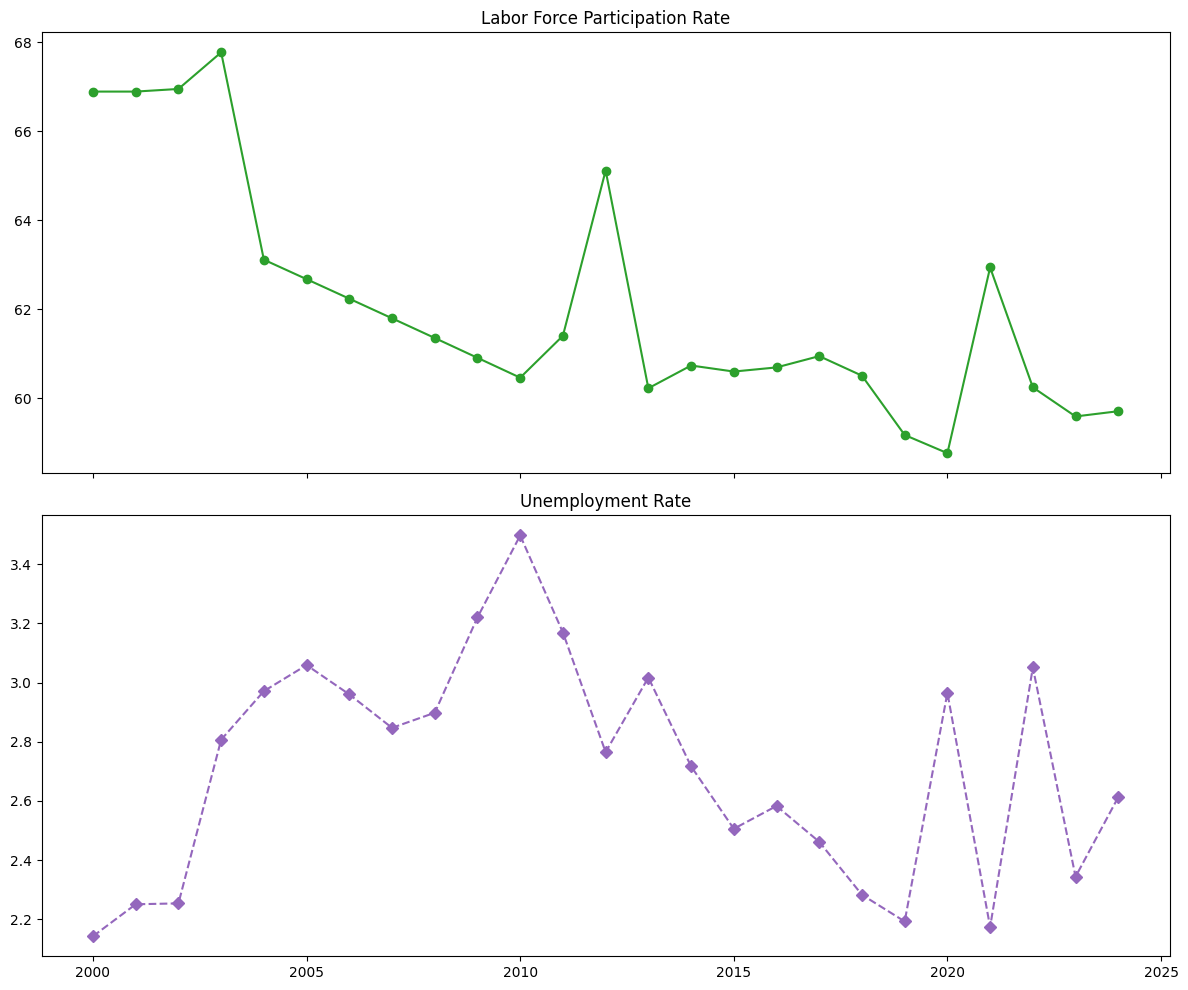

In [ ]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,10),sharex=True)
ax1.plot(df_gtm.index,df_gtm['Labor_Part_Rate'],color='tab:green',marker='o')
ax1.set_title('Labor Force Participation Rate')
ax2.plot(df_gtm.index,df_gtm['Unemployment_Rate'],color='tab:purple',marker='D',linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

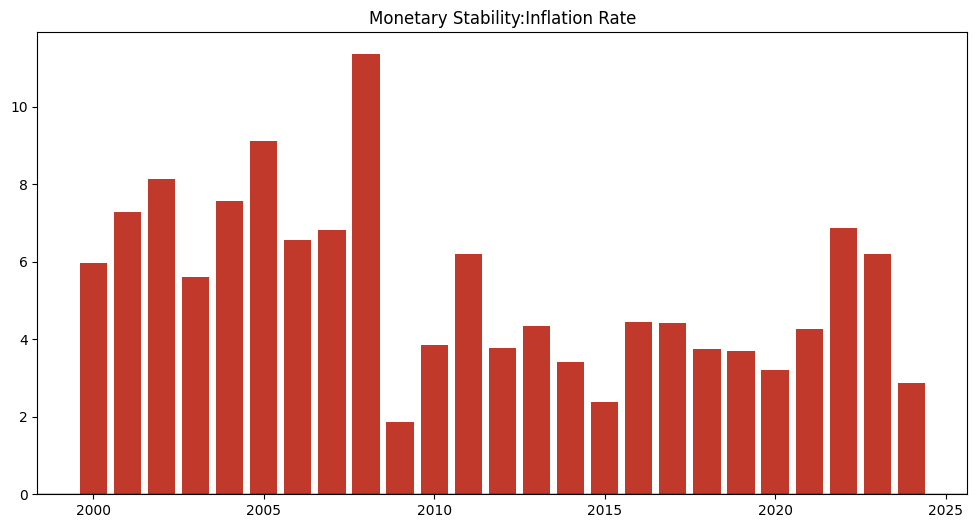

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(df_gtm.index,df_gtm['Inflation_CPI'],color='#c0392b')
plt.axhline(0,color='black',linewidth=1)
plt.title('Monetary Stability:Inflation Rate')
plt.show()

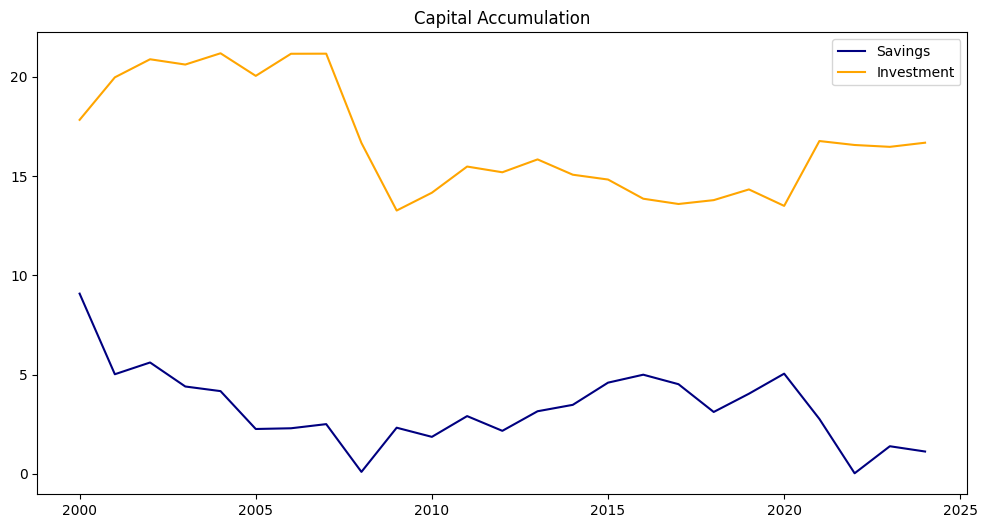

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_gtm.index,df_gtm['Gross_Dom_Savings'],label='Savings',color='navy')
plt.plot(df_gtm.index,df_gtm['Gross_Cap_Formation'],label='Investment',color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

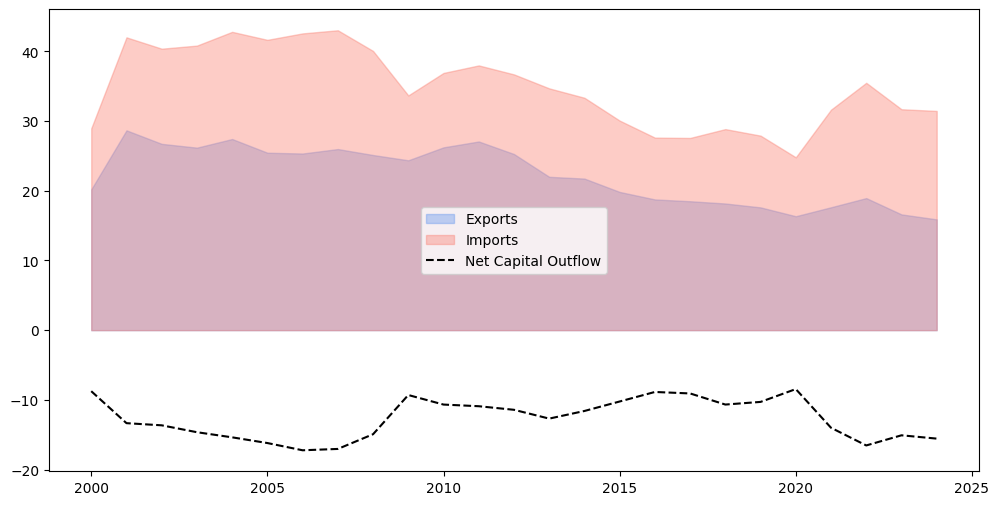

In [ ]:
plt.figure(figsize=(12,6))
plt.fill_between(df_gtm.index,df_gtm['Exports_GDP'],color='cornflowerblue',alpha=0.4,label='Exports')
plt.fill_between(df_gtm.index,df_gtm['Imports_GDP'],color='salmon',alpha=0.4,label='Imports')
plt.plot(df_gtm.index,df_gtm['Nco'],color='black',linestyle='--',label='Net Capital Outflow')
plt.legend()
plt.show()

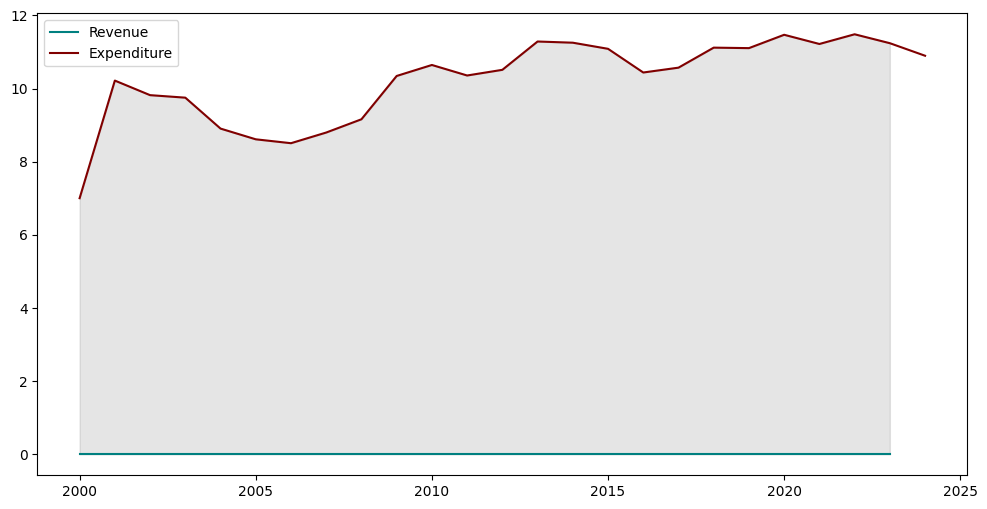

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_gtm.index,df_gtm['Tax_Rev_GDP'],label='Revenue',color='teal')
plt.plot(df_gtm.index,df_gtm['Gov_Exp_GDP'],label='Expenditure',color='maroon')
plt.fill_between(df_gtm.index,df_gtm['Tax_Rev_GDP'],df_gtm['Gov_Exp_GDP'],color='gray',alpha=0.2)
plt.legend()
plt.show()

The ugly chart

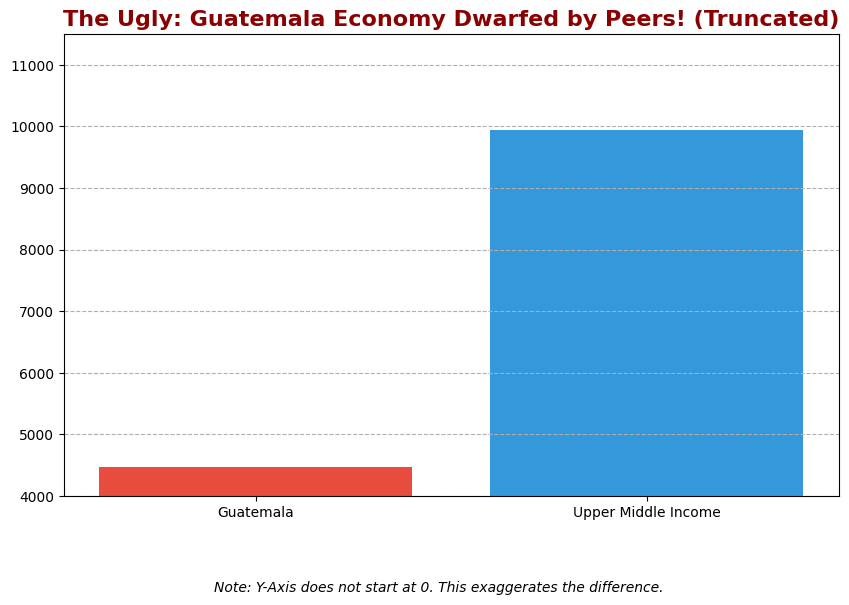

In [ ]:
from typing import ValuesView
snapshot_year=2023
gtm_val=df.loc[snapshot_year,('GTM','GDP_Per_Capita_Const')]
umc_val=df.loc[snapshot_year,('UMC','GDP_Per_Capita_Const')]
values=[gtm_val,umc_val]
labels=['Guatemala','Upper Middle Income']
plt.figure(figsize=(10,6))
bars=plt.bar(labels,values,color=['#e74c3c','#3498db'])
plt.ylim(4000,11500)
plt.title('The Ugly: Guatemala Economy Dwarfed by Peers! (Truncated)',fontsize=16,fontweight='bold',color='darkred')
plt.grid(axis='y',linestyle='--')
plt.figtext(0.5,-0.05,'Note: Y-Axis does not start at 0. This exaggerates the difference.',ha="center",style='italic')
plt.show()

The bad chart

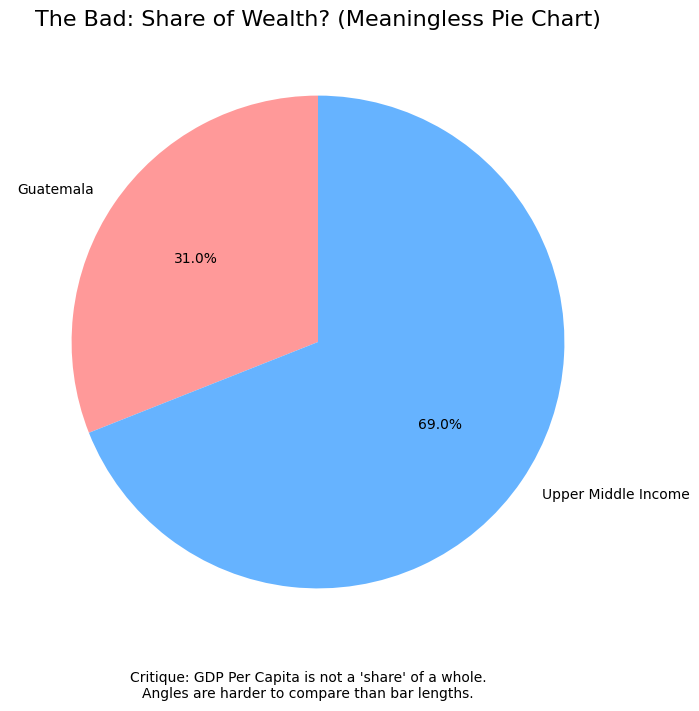

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(values,labels=labels,autopct='%1.1f%%',colors=['#ff9999','#66b3ff'],startangle=90)
plt.title('The Bad: Share of Wealth? (Meaningless Pie Chart)',fontsize=16)
plt.figtext(0.5,0.05,"Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.",ha="center")
plt.show()

# Task
Create an executive dashboard for Guatemala with a 2x3 subplot grid, using 'dark_background' style, titled 'Guatemala Economic Snapshot', and utilizing `tight_layout()`. The dashboard should visualize the following economic indicators: Real GDP (Line chart), Inflation Rate (Bar chart with horizontal line at 0), Unemployment Rate (Line chart), Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure), Trade Balance (Fill area between Exports and Imports), and Savings vs Investment (Dual lines).

## Create Executive Dashboard

### Subtask:
Generate a 2x3 subplot grid and plot the specified economic indicators for Guatemala: Real GDP (Line chart), Inflation Rate (Bar chart with horizontal line at 0), Unemployment Rate (Line chart), Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure), Trade Balance (Fill area between Exports and Imports), and Savings vs Investment (Dual lines). The dashboard will use 'dark_background' style, have a main title 'Guatemala Economic Snapshot', and use `tight_layout()`.


**Reasoning**:
I need to generate a 2x3 subplot grid with specific economic indicators for Guatemala, following all the plotting instructions, including setting the style, titles, labels, and using `tight_layout()`.



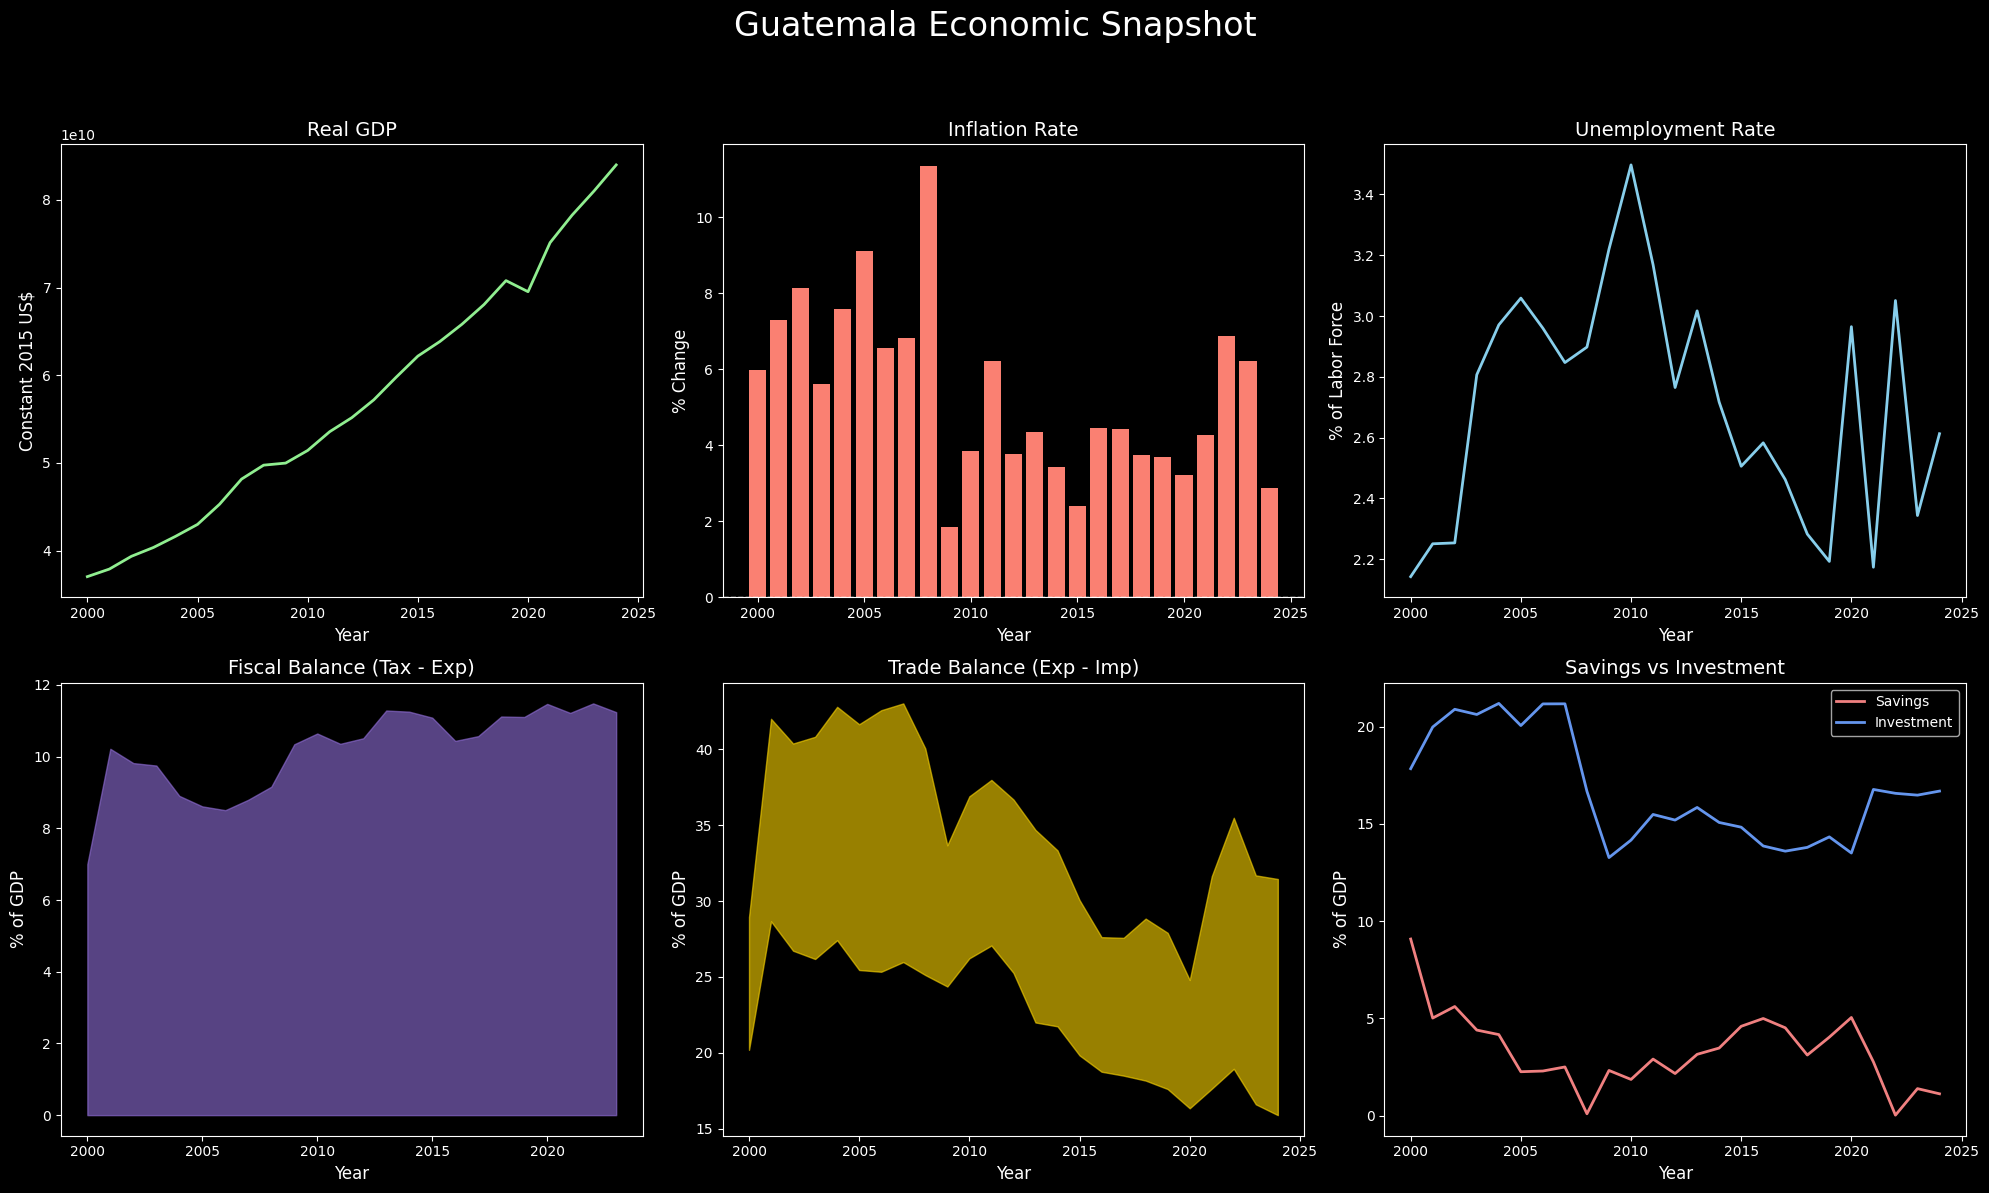

In [ ]:
plt.style.use('dark_background')

fig, axs = plt.subplots(2, 3, figsize=(20, 12)) # Adjusted figsize for better readability

# 1. Real GDP (Line chart)
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', ax=axs[0, 0], color='lightgreen', linewidth=2)
axs[0, 0].set_title('Real GDP', fontsize=14)
axs[0, 0].set_ylabel('Constant 2015 US$', fontsize=12)
axs[0, 0].set_xlabel('Year', fontsize=12)

# 2. Inflation Rate (Bar chart with horizontal line at 0)
axs[0, 1].bar(df_gtm.index, df_gtm['Inflation_CPI'], color='salmon')
axs[0, 1].axhline(0, color='white', linewidth=1, linestyle='--')
axs[0, 1].set_title('Inflation Rate', fontsize=14)
axs[0, 1].set_ylabel('% Change', fontsize=12)
axs[0, 1].set_xlabel('Year', fontsize=12)

# 3. Unemployment Rate (Line chart)
sns.lineplot(data=df_gtm, x=df_gtm.index, y='Unemployment_Rate', ax=axs[0, 2], color='skyblue', linewidth=2)
axs[0, 2].set_title('Unemployment Rate', fontsize=14)
axs[0, 2].set_ylabel('% of Labor Force', fontsize=12)
axs[0, 2].set_xlabel('Year', fontsize=12)

# 4. Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure)
axs[1, 0].fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='mediumpurple', alpha=0.6)
axs[1, 0].set_title('Fiscal Balance (Tax - Exp)', fontsize=14)
axs[1, 0].set_ylabel('% of GDP', fontsize=12)
axs[1, 0].set_xlabel('Year', fontsize=12)

# 5. Trade Balance (Fill area between Exports and Imports)
axs[1, 1].fill_between(df_gtm.index, df_gtm['Exports_GDP'], df_gtm['Imports_GDP'], color='gold', alpha=0.6)
axs[1, 1].set_title('Trade Balance (Exp - Imp)', fontsize=14)
axs[1, 1].set_ylabel('% of GDP', fontsize=12)
axs[1, 1].set_xlabel('Year', fontsize=12)

# 6. Savings vs Investment (Dual lines)
sns.lineplot(data=df_gtm, x=df_gtm.index, y='Gross_Dom_Savings', ax=axs[1, 2], label='Savings', color='lightcoral', linewidth=2)
sns.lineplot(data=df_gtm, x=df_gtm.index, y='Gross_Cap_Formation', ax=axs[1, 2], label='Investment', color='cornflowerblue', linewidth=2)
axs[1, 2].set_title('Savings vs Investment', fontsize=14)
axs[1, 2].set_ylabel('% of GDP', fontsize=12)
axs[1, 2].set_xlabel('Year', fontsize=12)
axs[1, 2].legend(fontsize=10)

# Main title for the entire figure
fig.suptitle('Guatemala Economic Snapshot', fontsize=24, y=1.02) # Adjusted y to prevent overlap with subplot titles

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjusted rect to make space for suptitle
plt.show()

## Final Task

### Subtask:
Review the generated executive dashboard and provide any further analysis or insights.


## Summary:

### Data Analysis Key Findings

*   The dashboard effectively visualizes Guatemala's Real GDP trend over time, using a line chart to show economic growth.
*   Inflation Rate is presented as a bar chart, clearly indicating periods of positive or negative price changes relative to a zero baseline.
*   The Unemployment Rate is shown via a line chart, illustrating fluctuations in the labor market.
*   Fiscal Balance is depicted as the area between Tax Revenue and Government Expenditure as a percentage of GDP, providing a visual representation of government financial health (surplus or deficit).
*   Trade Balance is similarly visualized as the area between Exports and Imports as a percentage of GDP, indicating the country's net trade position.
*   The relationship between Gross Domestic Savings and Gross Capital Formation (Investment) is clearly presented through dual line charts, both as a percentage of GDP, allowing for comparison of resource mobilization and allocation.

### Insights or Next Steps

*   This dashboard provides a foundational overview of Guatemala's economic performance across key indicators. Further analysis could involve identifying correlations between these indicators (e.g., impact of inflation on GDP growth or unemployment) and examining the periods of significant changes in each metric.
*   To provide actionable insights, the next step would be to add comparative data (e.g., regional averages, historical benchmarks, or policy targets) and incorporate more detailed temporal analysis to identify cycles, seasonality, or the impact of specific economic events or policy implementations.
